Тестовое задание в ВТБ.  
Геоаналитика  
Батутин А.В  
08.08.2025  

# Импорты

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Patch
from ydata_profiling import ProfileReport

warnings.filterwarnings('ignore')

In [2]:
KEY_CLIENT = 'Ид. клиента'
KEY_TP = 'Код БИСКВИТ'
LIST_DEL_TP = [755,1455,1855,1955,55]#добавим 55,он не обслуживает физ лица. Нужно для конечного результата

In [3]:
def check_quality(data: pd.DataFrame):
    "Функция проверяет качество данных"
    print(f'Размерность данных {data.shape}')
    print(f'Кол-во дубликатов : {data.duplicated().sum()}')
    print(f'Кол-во пропусков : {data.isna().sum().sum()}')


# Задача 

Данные: информация по офисам и банкоматам (координаты, режим работы, формат работы),   
визиты клиентов в отделения банка, операции клиентов в банкоматах,   
POS-операции клиентов в городе Краснодар.   
Все данные собраны за 2021 год, все операции с координатами.   
Можно использовать не все данные


Задание: посчитать как в среднем распределяется клиентопоток физ лиц между отделениями банка в Краснодаре,
как он будет распределяться между отделениями банка в Краснодаре, если 4 офиса закроются навсегда (755, 1455, 1855, 1955)

# Термины

POS-операции клиентов в городе Краснодар  
информация по офисам и банкоматам (координаты, режим работы, формат работы)  
визиты клиентов в отделения банка  
операции клиентов в банкоматах  
  
АТМ - банкомат  
POS-платежи  
ТП-офисы


# Ключевые вопросы и мысли по ходу работы

* ~~Что такое лучшая-лучший?~~
* ~~Домашняя локация для каждого клиента~~
* ~~Отбираем строчки транзакций людей,в рабочее время в будни~~
* ~~Клиенты либо с работы либо на работу ходят в банк отделения~~
* ~~клиент может быть и на работе и дома,ему нужен ближайший офис~~
* ~~пересекающиеся даты~~
* ~~временной ряд~~
* ~~если исключаемое отделение единственное для этого клиента?~~
* ~~как меняется нагрузка на офисы до и после~~
* ~~Нам нужно понять,где наиболее часто обитает клиент,где он обычно посещает офисы~~
* ~~И в какие дни~~
* ~~у нас есть посещения банкоматов и атм~~

# EDA с помощью ProfileReport

### Справочник клиентов

In [4]:
# clients_tp = pd.read_excel('/Users/andrejbatutin/DS/VTB/Лучшая_ТП_Краснодар_Клиенты_пол_возраст.xlsx')
# clients_us = pd.read_excel('/Users/andrejbatutin/DS/VTB/Лучший_УС_Краснодар_Клиенты_пол_возраст.xlsx')
# concated_clients = clients_tp.merge(clients_us,how='cross')
# display(concated_clients.loc[concated_clients['Ид. клиента_x']==concated_clients['Ид. клиента_y']])
# ProfileReport(clients_us).to_widgets()
"""
ПОЛЯ:
#'Ид. клиента', 'Возраст', 'Пол']

АЛЕРТЫ:
#не одинаковые,противоречат:1 клиент мужчина в другом файле уже женщина 

#пропусков нет
#дубликатов нет
"""


"\nПОЛЯ:\n#'Ид. клиента', 'Возраст', 'Пол']\n\nАЛЕРТЫ:\n#не одинаковые,противоречат:1 клиент мужчина в другом файле уже женщина \n\n#пропусков нет\n#дубликатов нет\n"

### ATM ТРАНЗАКЦИИ

In [5]:

# df1 = pd.read_excel('/Users/andrejbatutin/DS/VTB/Лучшая_ТП_Краснодар_Справочник_АТМ.xlsx')
operations_atm = pd.read_csv('/Users/andrejbatutin/DS/VTB/Лучший_УС_Краснодар_Транзакции_АТМ.csv', encoding='cp1251')
meta_atm = pd.read_excel('/Users/andrejbatutin/DS/VTB/Лучший_УС_Краснодар_Справочник_АТМ.xlsx')
# ProfileReport(meta_atm).to_widgets()

#alerts:
"""
ПОЛЯ
#['Номер АТМ', 'Широта', 'Долгота', 'Время работы', 'Функционал','Сегмент', 'Доступность'],
#['Ид. клиента', 'Номер АТМ', 'Дата', 'Время', 'Направление транзакции','Сумма'],

operations_atm:пропусков нет,дубликатов нет
meta_atm:!76 пропусков!,дубликатов нет

Данную инфо выписываю для себя:
Алерты meta_atm:
Время работы is highly overall correlated with Доступность and 2 other fields
Доступность is highly overall correlated with Время работы
Сегмент is highly overall correlated with Время работы
Функционал is highly overall correlated with Время работы
Доступность is highly imbalanced (60.0%)
Время работы has 40 (21.4%) missing values
Доступность has 36 (19.3%) missing values
Номер АТМ has unique values

TODO:
Нужно удалить пропуски meta_atm
"""




"\nПОЛЯ\n#['Номер АТМ', 'Широта', 'Долгота', 'Время работы', 'Функционал','Сегмент', 'Доступность'],\n#['Ид. клиента', 'Номер АТМ', 'Дата', 'Время', 'Направление транзакции','Сумма'],\n\noperations_atm:пропусков нет,дубликатов нет\nmeta_atm:!76 пропусков!,дубликатов нет\n\nДанную инфо выписываю для себя:\nАлерты meta_atm:\nВремя работы is highly overall correlated with Доступность and 2 other fields\nДоступность is highly overall correlated with Время работы\nСегмент is highly overall correlated with Время работы\nФункционал is highly overall correlated with Время работы\nДоступность is highly imbalanced (60.0%)\nВремя работы has 40 (21.4%) missing values\nДоступность has 36 (19.3%) missing values\nНомер АТМ has unique values\n\nTODO:\nНужно удалить пропуски meta_atm\n"

### POS ТРАНЗАКЦИИ

In [6]:
#ПОС ТРАНЗАКЦИИ

# pos = pd.read_excel('/Users/andrejbatutin/DS/VTB/Лучшая_ТП_Краснодар_Транзакции_ПОС.xlsx')
pos = pd.read_csv('/Users/andrejbatutin/DS/VTB/Лучший_УС_Краснодар_Транзакции_ПОС.csv', encoding='cp1251')
# ProfileReport(pos).to_widgets()

"""
Поля 
#['Ид. клиента', 'MCC', 'Дата транзакции', 'Время транзакции', 'Широта','Долгота', 'Сумма транзакции'],
# ['Ид. клиента', 'MCC', 'Дата транзакции', 'Время транзакции', 'Широта','Долгота', 'Долгота.1'],

Алерты
Dataset has 19955 (0.3%) duplicate rows
Долгота.1 is highly skewed (γ1 = -250.9649013)
Missing cells 8101
Date с 21 по 22 год
TODO:

Нужно удалить пропуски √
Нужно удалить дубликаты √
"""

"\nПоля \n#['Ид. клиента', 'MCC', 'Дата транзакции', 'Время транзакции', 'Широта','Долгота', 'Сумма транзакции'],\n# ['Ид. клиента', 'MCC', 'Дата транзакции', 'Время транзакции', 'Широта','Долгота', 'Долгота.1'],\n\nАлерты\nDataset has 19955 (0.3%) duplicate rows\nДолгота.1 is highly skewed (γ1 = -250.9649013)\nMissing cells 8101\nDate с 21 по 22 год\nTODO:\n\nНужно удалить пропуски √\nНужно удалить дубликаты √\n"

### СПРАВОЧНИК ОФИСЫ


In [7]:

# tp = pd.read_excel('/Users/andrejbatutin/DS/VTB/Лучшая_ТП_Краснодар_Справочник_ТП.xlsx')
meta_tp = pd.read_excel('/Users/andrejbatutin/DS/VTB/Лучший_УС_Краснодар_Справочник_ТП.xlsx')
# ProfileReport(meta_tp).to_widgets()
"""
ПОЛЯ
['Код БИСКВИТ', 'Широта', 'Долгота', 'Понедельник', 'Вторник', 'Среда','Четверг', 'Пятница', 'Суббота', 'Воскресенье',
        #'Зона самообслуживания(24/7)', 'Формат']

АЛЕРТЫ:
Воскресенье is highly overall correlated with Вторник and 7 other fields
Вторник is highly overall correlated with Воскресенье and 7 other fields
Зона самообслуживания(24/7) is highly overall correlated with Вторник and 5 other fields
Код БИСКВИТ is highly overall correlated with Воскресенье
Понедельник is highly overall correlated with Воскресенье and 7 other fields
Пятница is highly overall correlated with Воскресенье and 7 other fields
Среда is highly overall correlated with Воскресенье and 7 other fields
Суббота is highly overall correlated with Воскресенье and 6 other fields
Формат is highly overall correlated with Воскресенье and 7 other fields
Четверг is highly overall correlated with Воскресенье and 7 other fields
Воскресенье is highly imbalanced (60.9%)
Код БИСКВИТ has unique values
TODO:
Пропусков нет
Дубликатов нет
"""


"\nПОЛЯ\n['Код БИСКВИТ', 'Широта', 'Долгота', 'Понедельник', 'Вторник', 'Среда','Четверг', 'Пятница', 'Суббота', 'Воскресенье',\n        #'Зона самообслуживания(24/7)', 'Формат']\n\nАЛЕРТЫ:\nВоскресенье is highly overall correlated with Вторник and 7 other fields\nВторник is highly overall correlated with Воскресенье and 7 other fields\nЗона самообслуживания(24/7) is highly overall correlated with Вторник and 5 other fields\nКод БИСКВИТ is highly overall correlated with Воскресенье\nПонедельник is highly overall correlated with Воскресенье and 7 other fields\nПятница is highly overall correlated with Воскресенье and 7 other fields\nСреда is highly overall correlated with Воскресенье and 7 other fields\nСуббота is highly overall correlated with Воскресенье and 6 other fields\nФормат is highly overall correlated with Воскресенье and 7 other fields\nЧетверг is highly overall correlated with Воскресенье and 7 other fields\nВоскресенье is highly imbalanced (60.9%)\nКод БИСКВИТ has unique va

### Операции клиентов в банковских отделениях

In [8]:
# df1 = pd.read_excel('/Users/andrejbatutin/DS/VTB/Лучшая_ТП_Краснодар_Операции_в_ТП.xlsx')
operations_tp = pd.read_excel('/Users/andrejbatutin/DS/VTB/Лучший_УС_Краснодар_Операции_в_ТП.xlsx')
# ProfileReport(operations_tp).to_widgets()
"""
Поля:
#['Ид. клиента', 'Код БИСКВИТ', 'Дата начала операции','Время начала операции']
Алерты:
Dataset has 56 (< 0.1%) duplicate rows
TODO:
Нужно удалить дубликаты
"""

"\nПоля:\n#['Ид. клиента', 'Код БИСКВИТ', 'Дата начала операции','Время начала операции']\nАлерты:\nDataset has 56 (< 0.1%) duplicate rows\nTODO:\nНужно удалить дубликаты\n"

# ХОД РЕШЕНИЯ

Выпишем еще раз 2 ключевые задачи:

Посчитать, как в среднем распределяется клиентопоток физлиц между отделениями банка в Краснодаре.
Как будет распределяться между отделениями банка в Краснодаре, если 4 офиса закроются навсегда (755, 1455, 1855, 1955).
Я сделаю предположение, что для нас важно правильно учитывать распределение клиентопотока между отделениями
для решения разных задач:

- определение оптимального числа персонала для эффективного обслуживания клиентов;
- равномерное распределение сотрудников банка внутри смен для эффективного обслуживания клиентов;
- моделирование открытия и закрытия банковских отделений для более эффективного распределения сети отделений с целью наибольшего территориального покрытия услугами банка.

Если клиент ходил просто снимать деньги в офисе, то при закрытии офиса с банкоматом он будет искать любой другой удобный.  
Но если закроется отделение, которое ему нужно для услуги, тогда он пойдет в ближайшее доступное отделение.  

Поэтому информацию о транзакциях в терминалах будем учитывать частично.  
Отберём те терминалы, которые не находятся в офисах — это даст нам дополнительную информацию о геолокациях клиентов (где они бывают помимо POS-платежей).  
Пользование терминалами в отделениях не является для нас целевой информацией.  

In [9]:
# check_quality(operations_atm)
operations_atm['Номер АТМ'] = operations_atm['Номер АТМ'].astype(str)
meta_atm['Номер АТМ'] = meta_atm['Номер АТМ'].astype(str)
operations_atm = operations_atm.merge(meta_atm[['Номер АТМ','Широта','Долгота']])#ПРИМЕРЖИВАНИЕМ ГЕО К ОПЕРАЦИЯМ БАНКОМАТОВ
# check_quality(operations_atm)
operations_atm_in_tp = operations_atm.loc[(operations_atm['Широта'].isin(meta_tp['Широта']))#в отделениях
                   &
                   (operations_atm['Долгота'].isin(meta_tp['Долгота']))]
operations_atm_not_tp = operations_atm.loc[~(operations_atm['Широта'].isin(meta_tp['Широта']))]#не в отделениях
print(f'Операций в банкоматах,расположенных в отделениях {len(operations_atm_in_tp)//1000}k')
print(f'Операций в банкоматах,расположенных не в отделениях {len(operations_atm_not_tp)//1000}k')


Операций в банкоматах,расположенных в отделениях 519k
Операций в банкоматах,расположенных не в отделениях 789k



Нам нужно определить, каким образом он будет выбирать ближайшее удобное место.

Пайплайн решения:

1.Если клиент не ходил в закрываемые офисы, то "рекомендовать" новый для оценки перераспределения трафика не нужно.  
2.Если у нас есть данные о POS-платежах клиентов, мы оцениваем среднюю удаленность геолокации каждого клиента от каждого офиса и вычисляем ближайший.  
3.Если по геолокации рекомендаций нет, но клиент ходил в офисы, которые мы хотим закрыть, то можно учесть его популярные офисы (за исключением закрываемых)   
4.Если он ходил только в закрываемые, то определяем ближайший офис к закрываемому и предполагаем, что клиент пойдет туда.  
Метод оценки:  
Изначально я хотел разбить данные на train/test:

На train оценивать ближайшие офисы для клиента,  
На test моделировать изменение клиентопотока.  
Но в этом нет смысла, так как в тестовой выборке подмена офисов не происходит, и мы не сможем оценить погрешность.  
Поэтому анализ закономерностей и оценку изменения клиентопотока проводим сразу на всех данных — методика будет одинаковой.  

Так как у нас есть много POS-данных по клиентам, нам необходимо понять в них,  
где клиенты географически находятся в то время, когда работают офисы.  

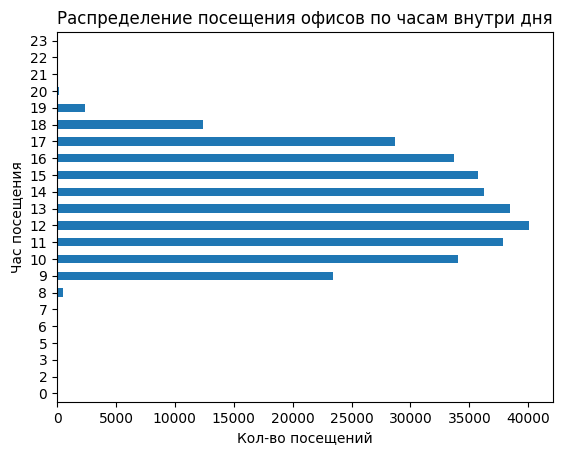

In [10]:

operations_tp['Час посещения'] = pd.to_datetime(operations_tp['Время начала операции']).dt.hour
operations_tp['День недели посещения'] = pd.to_datetime(operations_tp['Дата начала операции']).dt.day_of_week+1
operations_tp['Месяц посещения'] = pd.to_datetime(operations_tp['Дата начала операции']).dt.month

operations_tp.groupby('Час посещения')['Час посещения'].count().plot(kind='barh')
plt.title('Распределение посещения офисов по часам внутри дня')
plt.xlabel('Кол-во посещений')
plt.show()


Видим,что офисы посещают в основном с 9 до 18  
Нужно посмотреть в какие дни посещают офисы

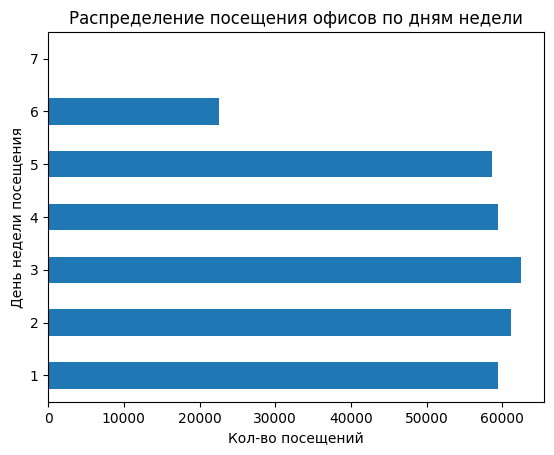

In [11]:
operations_tp.groupby('День недели посещения')['День недели посещения'].count().plot(kind='barh')
plt.title('Распределение посещения офисов по дням недели')
plt.xlabel('Кол-во посещений')
plt.show()

Видим,что в основном посещения по будням и немного по субботам

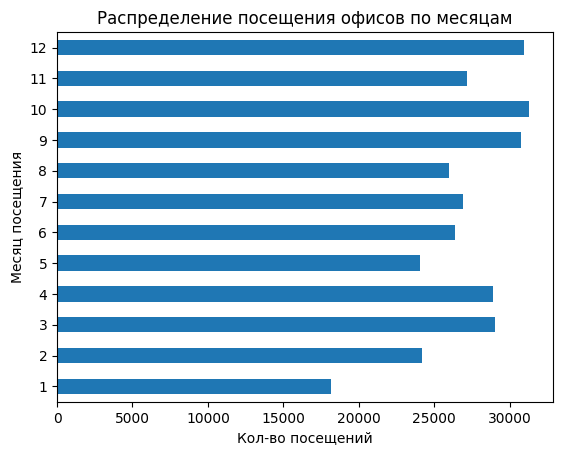

In [12]:
operations_tp.groupby('Месяц посещения')['Месяц посещения'].count().plot(kind='barh')
plt.title('Распределение посещения офисов по месяцам')
plt.xlabel('Кол-во посещений')
plt.show()

Видим,что распределение по месяцем примерно равномерное,тенденции к регрессии нет

удалим 2 наблюдения с посещениями офисов в воскресенье.  
По справочник только некоторые в субботу принимают

In [13]:
operations_tp = operations_tp.loc[operations_tp['День недели посещения']!=7]

# Ответ на вопрос №1
* Посчитать как в среднем распределяется клиентопоток физ лиц между отделениями банка в Краснодаре


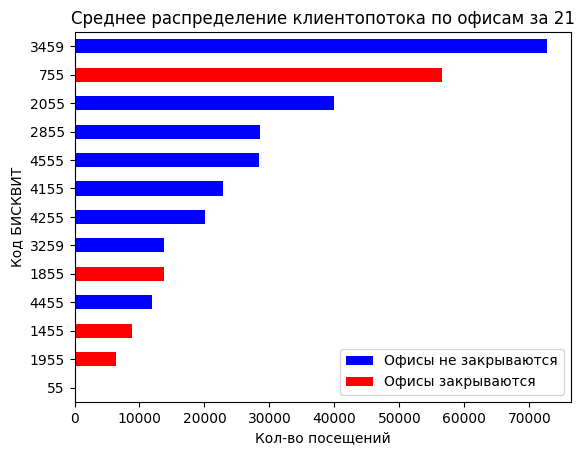

In [14]:
counts = operations_tp.groupby(KEY_TP)[KEY_TP].count().sort_values()
colors = []
labels = []
for x in counts.index:
    if x in LIST_DEL_TP:
        colors.append('red')
        labels.append('Офисы закрываются')
    else:
        colors.append('blue')
        labels.append('Офисы не закрываются')
ax = counts.plot(kind='barh', color=colors)
plt.title('Среднее распределение клиентопотока по офисам за 21')
plt.xlabel('Кол-во посещений')

legend_elements = [
    Patch(facecolor='blue', label='Офисы не закрываются'),
    Patch(facecolor='red', label='Офисы закрываются')
]
ax.legend(handles=legend_elements, loc='best')
plt.show()

Видим, что нам очень ёмкий по посещению офис 755 закроется, его объём перераспределят другие офисы при закрытии.  
55-й не работает с клиентами по справочнику.

# Ответ на вопрос №2
Как  будет распределяться траффик между отделениями банка в Краснодаре, если 4 офиса закроются навсегда (755, 1455, 1855, 1955)

На основании полученной информации загрузим POS-данные, обработаем дубликаты:

- удалим информацию о POS-транзакциях клиентов в то время, когда офисы закрыты;
- объединим с информацией по пользованию терминалами вне офисов.

In [15]:
pos = pd.read_csv('/Users/andrejbatutin/DS/VTB/Лучший_УС_Краснодар_Транзакции_ПОС.csv', encoding='cp1251')
pos = pos[['Ид. клиента','Дата транзакции', 'Время транзакции', 'Широта',
       'Долгота']]
check_quality(pos)
pos.isna().sum()

Размерность данных (5876929, 5)
Кол-во дубликатов : 20970
Кол-во пропусков : 0


Ид. клиента         0
Дата транзакции     0
Время транзакции    0
Широта              0
Долгота             0
dtype: int64

Возьмем операции в терминалах вне банков, приведем их к схеме данных POS и объединим.  
Этот набор данных даст общее представление о том, где клиенты чаще всего находятся с географической точки зрения.  

In [16]:
operations_atm_not_tp = operations_atm_not_tp[['Ид. клиента','Дата', 'Время', 'Широта',
       'Долгота']].rename(columns={'Дата':'Дата транзакции',
                                   'Время':'Время транзакции'})
pos = pd.concat([pos]+[operations_atm_not_tp])#сведеные данные POS платежи + ATM

In [17]:
#Дубликаты удалили
pos = pos.drop_duplicates()
check_quality(pos)

Размерность данных (6645843, 5)
Кол-во дубликатов : 0
Кол-во пропусков : 0


Оставим информацию о ПОС-транзакциях только за рабочее время отделений.  
Нам важно понимать геораспределение клиентов именно в рабочие дни офисов.  

In [18]:

pos['Час транзакции'] = pd.to_datetime(pos['Время транзакции']).dt.hour
pos['День транзакции'] = pd.to_datetime(pos['Дата транзакции']).dt.day_of_week+1
print(f'строк до удаления {pos.shape}')
pos = pos.loc[(pos['День транзакции'].isin(list(range(1,6))))#Будни
        &
        (pos['Час транзакции'].isin(list(range(9,19))))#Рабочие часы
        ]
print(f'строк после удаления {pos.shape}')

строк до удаления (6645843, 7)
строк после удаления (3638365, 7)


Возьмем все офисы и их геолокацию

In [19]:
offices = pd.read_excel('/Users/andrejbatutin/DS/VTB/Лучший_УС_Краснодар_Справочник_ТП.xlsx')
offices = offices[['Код БИСКВИТ','Широта','Долгота']]
offices = offices.rename(columns={
    'Широта': 'Широта_ОТДЕЛ',
    'Долгота': 'Долгота_ОТДЕЛ',
})

Сделаем кроссджоин все транзакции клиентов с гео и все офисы с гео

In [20]:
cross_pos = pos.merge(offices,how='cross')
cross_pos = cross_pos.rename(columns={
    'Широта': 'Широта_ПОС',
    'Долгота': 'Долгота_ПОС',
})
check_quality(cross_pos)# пропуски это MCC

Размерность данных (47298745, 10)
Кол-во дубликатов : 0
Кол-во пропусков : 0


У нас удаление каждой транзакции клиентов до каждого офиса

In [21]:
cross_pos.head(10)

,Ид. клиента,Дата транзакции,Время транзакции,Широта_ПОС,Долгота_ПОС,Час транзакции,День транзакции,Код БИСКВИТ,Широта_ОТДЕЛ,Долгота_ОТДЕЛ
0,11276,2021-01-11,11:27:45,45.069384,38.974244,11,1,55,45.027667,38.967156
1,11276,2021-01-11,11:27:45,45.069384,38.974244,11,1,755,45.021099,39.018414
2,11276,2021-01-11,11:27:45,45.069384,38.974244,11,1,1455,45.038337,38.989408
3,11276,2021-01-11,11:27:45,45.069384,38.974244,11,1,1855,45.019729,38.984611
4,11276,2021-01-11,11:27:45,45.069384,38.974244,11,1,1955,45.019850,38.969070
5,11276,2021-01-11,11:27:45,45.069384,38.974244,11,1,2055,45.101840,38.980793
6,11276,2021-01-11,11:27:45,45.069384,38.974244,11,1,2855,45.047609,38.977712
7,11276,2021-01-11,11:27:45,45.069384,38.974244,11,1,3259,45.031343,39.044070
8,11276,2021-01-11,11:27:45,45.069384,38.974244,11,1,3459,45.027667,38.967156
9,11276,2021-01-11,11:27:45,45.069384,38.974244,11,1,4155,45.018047,38.964111


Теперь перейдем к реализации главной идеи: ранжируем удаленность офисов от места пребывания клиентов.  

1.Мы посчитаем для каждой транзакции каждого клиента её удаление от всех 13 офисов.  
2.Затем для каждого клиента агрегируем информацию о медианной удалённости его транзакций до каждого офиса.  
3.Чем дальше медианная транзакция от офиса, тем менее вероятно, что клиент пойдёт в такой далёкий офис.  

Пробовал стек geodesic, geopandas, но скорость расчетов не радует для больших данных.  
Для нашей задачи воспользуемся формулой гаверсинусов.  
Просто усреднить широту или долготу нельзя (средняя точка между 170 и -170 — не 0).  

Формула работает верно: проверил на нескольких наблюдениях на калькуляторе геоданных и 2ГИС.  
Так как используются математические формулы на оптимизированном numpy, расчет получается быстрым и точным.  

In [22]:
def haversine(lat1:float, lon1:float, lat2:float, lon2:float):
    """
    Haversine (формула гаверсинусов) — это математическая формула, 
    позволяющая рассчитать кратчайшее расстояние между двумя точками на сфере (например, на Земле), 
    используя их широту и долготу.
    """
    R = 6371  # Радиус Земли в км
    lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

In [23]:
print(f'Расстояние между Краснодар Красная улица 176 и')
print(f'Краснодар Солнечная 15\3')
print(f'{round(haversine(45.046871, 38.980029,45.073757, 39.002981),1)}км')


Расстояние между Краснодар Красная улица 176 и
Краснодар Солнечная 15
3.5км


Очень точно считает,проверил линейкой в 2гис
Можно доверять

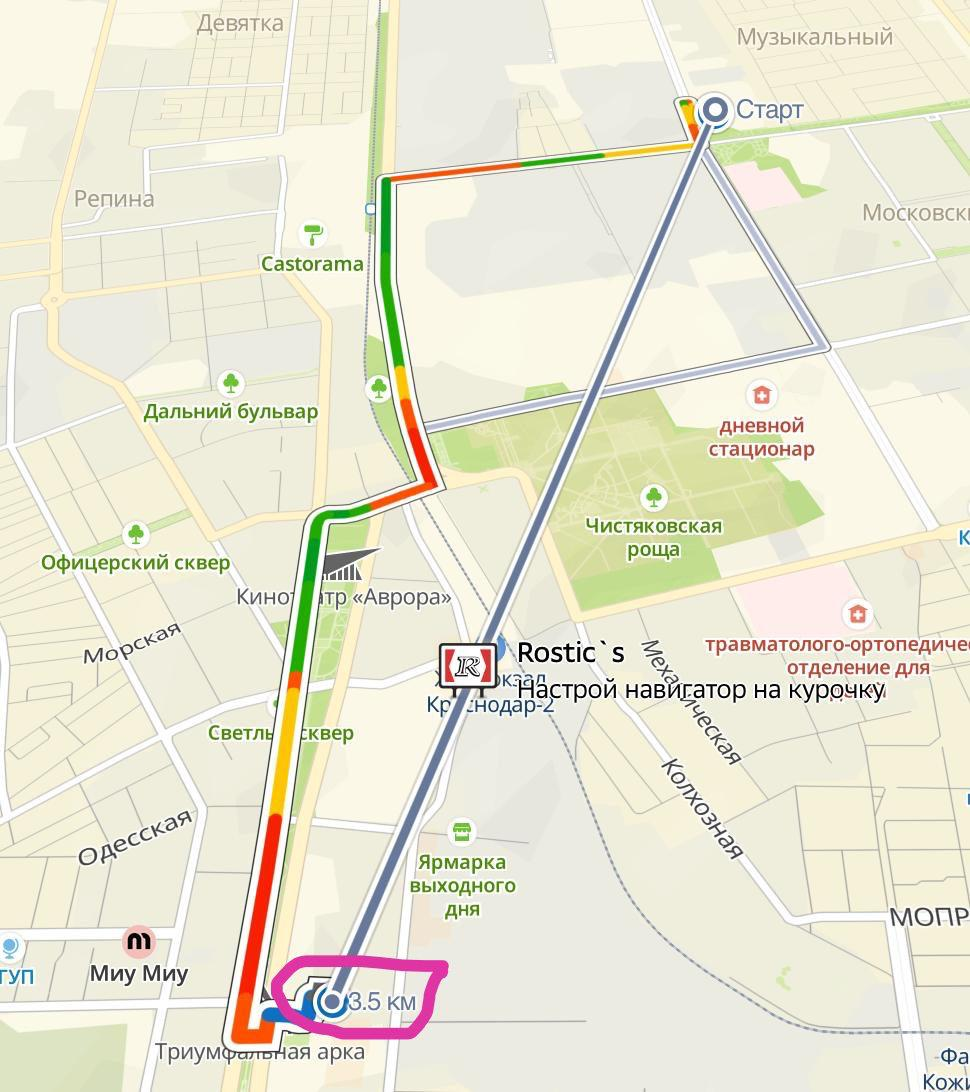

In [24]:
from IPython.display import Image
Image("/Users/andrejbatutin/DS/VTB/distance.jpg", width=1000, height=400)

Теперь считаем расстояния каждой транзакции до каждого офиса

In [25]:
cross_pos["distance_km"] = haversine(
    cross_pos["Широта_ПОС"], cross_pos["Долгота_ПОС"],
    cross_pos["Широта_ОТДЕЛ"], cross_pos["Долгота_ОТДЕЛ"]
)
cross_pos.head()[['Широта_ПОС','Долгота_ПОС','Широта_ОТДЕЛ','Долгота_ОТДЕЛ','distance_km']]

,Широта_ПОС,Долгота_ПОС,Широта_ОТДЕЛ,Долгота_ОТДЕЛ,distance_km
0,45.069384,38.974244,45.027667,38.967156,4.672020
1,45.069384,38.974244,45.021099,39.018414,6.392881
2,45.069384,38.974244,45.038337,38.989408,3.651993
3,45.069384,38.974244,45.019729,38.984611,5.581136
4,45.069384,38.974244,45.019850,38.969070,5.522909


Отлично, а теперь агрегируем медианное расстояние по клиентам до офисов.  
И видим отличную интерпретацию:  
Клиент 123153 сильно ближе (живет, находится, работает, отдыхает) с офисом 4555, чем с офисом 2055.  

In [26]:
distance_client = cross_pos.groupby(['Ид. клиента','Код БИСКВИТ'])['distance_km'].median().reset_index().sort_values(by=['Ид. клиента','distance_km'],ascending=True)
distance_client.loc[distance_client[KEY_CLIENT]==123153]

,Ид. клиента,Код БИСКВИТ,distance_km
1198950,123153,4555,2.298023
1198940,123153,1455,4.078130
1198944,123153,2855,4.184527
1198945,123153,3259,4.644347
1198948,123153,4255,4.847892
1198943,123153,2055,4.914713
1198939,123153,755,5.073851
1198949,123153,4455,5.387119
1198941,123153,1855,5.884677
1198938,123153,55,6.014524


Удалим отсюда офисы, которые будут закрываться, и оставим только строчку с минимальным расстоянием и ближайшим офисом для каждого клиента.

In [27]:
distance_client = distance_client.loc[~distance_client['Код БИСКВИТ'].isin(LIST_DEL_TP)]  
min_distance_client = distance_client.drop_duplicates(subset=['Ид. клиента'],keep='first')
min_distance_client 

,Ид. клиента,Код БИСКВИТ,distance_km
6,3,2855,1.376356
20,4,3259,0.755169
32,5,2855,0.988600
51,6,4555,0.910382
60,8,3459,3.544838
...,...,...,...
1456438,151921,4155,4.718974
1456450,151922,3459,0.431921
1456463,151923,3459,0.431921
1456477,151925,4155,0.632043


У нас получился готовый маппинг.   
Так как в субботу тоже есть приём клиентов, нам нужно проставлять не все отделения, а только те, что ближе к клиенту и работают в субботу.  

In [28]:
client_mapping_weekday = min_distance_client.drop_duplicates('Ид. клиента').set_index('Ид. клиента')['Код БИСКВИТ']
client_mapping_weekday

Ид. клиента
3         2855
4         3259
5         2855
6         4555
8         3459
          ... 
151921    4155
151922    3459
151923    3459
151925    4155
151926    4155
Name: Код БИСКВИТ, Length: 112038, dtype: int64

In [29]:
tp_for_weekend = meta_tp.loc[(meta_tp['Суббота']!='выходной')
            &
        (~meta_tp['Код БИСКВИТ'].isin(LIST_DEL_TP))]['Код БИСКВИТ'].to_list()
distance_client_weekend = distance_client.loc[distance_client['Код БИСКВИТ'].isin(tp_for_weekend)]
min_distance_client_weekend = distance_client.drop_duplicates(subset=['Ид. клиента'],keep='first')
min_distance_client_weekend

,Ид. клиента,Код БИСКВИТ,distance_km
6,3,2855,1.376356
20,4,3259,0.755169
32,5,2855,0.988600
51,6,4555,0.910382
60,8,3459,3.544838
...,...,...,...
1456438,151921,4155,4.718974
1456450,151922,3459,0.431921
1456463,151923,3459,0.431921
1456477,151925,4155,0.632043


In [30]:
client_mapping_weekend = min_distance_client.drop_duplicates('Ид. клиента').set_index('Ид. клиента')['Код БИСКВИТ']
client_mapping_weekend

Ид. клиента
3         2855
4         3259
5         2855
6         4555
8         3459
          ... 
151921    4155
151922    3459
151923    3459
151925    4155
151926    4155
Name: Код БИСКВИТ, Length: 112038, dtype: int64

Проставим закрывающиеся офисы пропуском

Подсчитывать изменение клиентопотока будем в operations_tp_test_after
Проставим пропуски там,где будут закрываться офисы

In [31]:
operations_tp_test_after = operations_tp.copy(deep=True)
operations_tp_test_after['Код БИСКВИТ_оригинальный'] = operations_tp_test_after['Код БИСКВИТ']
operations_tp_test_after.loc[operations_tp_test_after['Код БИСКВИТ'].isin(LIST_DEL_TP),'Код БИСКВИТ'] = np.nan

Проставляем ближайший офис для будних и выходных дней на основании наименьшей удалённости от клиента.

In [32]:

operations_tp_test_after['День недели посещения'] = pd.to_datetime(operations_tp_test_after['Дата начала операции']).dt.day_of_week+1
mask_weekdays = operations_tp_test_after['День недели посещения'] != 6
operations_tp_test_after.loc[mask_weekdays, 'Код БИСКВИТ'] = (
    operations_tp_test_after.loc[mask_weekdays, 'Код БИСКВИТ']
    .fillna(operations_tp_test_after['Ид. клиента'].map(client_mapping_weekday))
)
mask_weekend = operations_tp_test_after['День недели посещения'] == 6
operations_tp_test_after.loc[mask_weekend, 'Код БИСКВИТ'] = (
    operations_tp_test_after.loc[mask_weekend, 'Код БИСКВИТ']
    .fillna(operations_tp_test_after['Ид. клиента'].map(client_mapping_weekend))
)

Не смогли заполнить офис для 4.7т клиента из 65 тыс. У этих клиентов нет POS- или ATM-транзакций.

In [33]:
operations_tp_test_after.loc[operations_tp_test_after[KEY_TP].isna()][KEY_CLIENT].nunique()

4781

Для оставшихся клиентов применим следующее решение.  
Смотрим по каждому клиенту, в какие офисы он ходил.  
Если офис закрывается, тогда берём следующий офис, в который клиент уже ходил (он ему знаком).  
На примере: у клиента №2 закрывается 755-й офис, тогда мы предполагаем, что в таком случае он пойдёт в 2855-й.  

In [34]:
collaborative_approach = operations_tp.groupby(['Ид. клиента','Код БИСКВИТ'])['Дата начала операции'].count().reset_index()
collaborative_approach = collaborative_approach.rename(columns={'Дата начала операции': 'Количество операций'})
collaborative_approach['Доля, %'] = (
    collaborative_approach['Количество операций'] / 
    collaborative_approach.groupby('Ид. клиента')['Количество операций'].transform('sum')
) * 100
collaborative_approach.loc[collaborative_approach[KEY_CLIENT]==2]


,Ид. клиента,Код БИСКВИТ,Количество операций,"Доля, %"
0,2,755,9,64.285714
1,2,2855,5,35.714286


Произведём подстановку.
Создадим маппинг «клиент — его уже знакомый офис» (не включая закрываемого).

In [35]:
collaborative_approach = collaborative_approach.loc[(~collaborative_approach[KEY_TP].isin(LIST_DEL_TP))]#НЕ учитываем закрывающиеся офисы
collaborative_approach = collaborative_approach.sort_values(by=[KEY_CLIENT,KEY_TP],ascending=False)#Сортируем по кол-ву посещений
collaborative_approach_mapping = collaborative_approach.drop_duplicates(subset=['Ид. клиента'],keep='first').set_index('Ид. клиента')['Код БИСКВИТ']#берем топ 1
collaborative_approach_mapping

Ид. клиента
151928    3259
151927    3459
151923    3459
151922    3459
151921    4255
          ... 
18        4455
17        4455
14        3459
13        2855
2         2855
Name: Код БИСКВИТ, Length: 51528, dtype: int64

Заполняем пропуск

In [36]:
operations_tp_test_after['Код БИСКВИТ'] = (
    operations_tp_test_after['Код БИСКВИТ']
    .fillna(operations_tp_test_after['Ид. клиента'].map(collaborative_approach_mapping)))

Заполнили 700 клиентов,4к все еще без оценки изменения посещений

In [37]:
operations_tp_test_after.loc[operations_tp_test_after[KEY_TP].isna()][KEY_CLIENT].nunique()

4058

У нас 4 тыс. клиентов не имеют POS-транзакций, ATM-транзакций и не посещали незакрываемые офисы.  
Для них выполним оценку следующим образом:  
Если клиент посещал только закрываемый офис, рассчитаем расстояние от этого офиса до других офисов  
и предположим, что клиент пошел бы в ближайший к закрываемому офису.  

In [38]:
meta_tp = pd.read_excel('/Users/andrejbatutin/DS/VTB/Лучший_УС_Краснодар_Справочник_ТП.xlsx')
meta_tp = meta_tp[['Код БИСКВИТ', 'Широта', 'Долгота']]
meta_tp = meta_tp.merge(meta_tp,how='cross')#Все со всеми
meta_tp = meta_tp.rename(columns={'Код БИСКВИТ_x':'Код БИСКВИТ_ЛЕВ', 'Широта_x':'Широта_ЛЕВ', 'Долгота_x':'Долгота_ЛЕВ',
                         'Код БИСКВИТ_y':'БИСКВИТ_ПРАВ', 'Широта_y':'Широта_ПРАВ','Долгота_y':'Долгота_ПРАВ'})
meta_tp["distance_km"] = haversine(
    meta_tp["Широта_ЛЕВ"], meta_tp["Долгота_ЛЕВ"],
    meta_tp["Широта_ПРАВ"], meta_tp["Долгота_ПРАВ"]
)#Считаем удаления все от всех


Произведем преобразования

In [39]:
meta_tp = meta_tp.loc[meta_tp['Код БИСКВИТ_ЛЕВ']!=meta_tp['БИСКВИТ_ПРАВ']]#удаляем пары сравнения офис сам с собой
meta_tp = meta_tp.sort_values(['Код БИСКВИТ_ЛЕВ','distance_km'])#Сортируем по удаленности
meta_tp = meta_tp.loc[meta_tp['distance_km']!=0] #3459 и 55 в одном здании,у них дистанция 0
meta_tp = meta_tp.loc[~meta_tp['БИСКВИТ_ПРАВ'].isin(LIST_DEL_TP)]#исключаем в нашей оценке куда пойдет клиент офисы,которые закроются
meta_tp = meta_tp.drop_duplicates('Код БИСКВИТ_ЛЕВ',keep='first')#оставляем ближайшие офисы от закрываемых
meta_tp.head()

,Код БИСКВИТ_ЛЕВ,Широта_ЛЕВ,Долгота_ЛЕВ,БИСКВИТ_ПРАВ,Широта_ПРАВ,Долгота_ПРАВ,distance_km
11,55,45.027667,38.967156,4455,45.031821,38.973175,0.661129
20,755,45.021099,39.018414,3259,45.031343,39.044070,2.315829
32,1455,45.038337,38.989408,2855,45.047609,38.977712,1.381082
50,1855,45.019729,38.984611,4455,45.031821,38.973175,1.617298
61,1955,45.019850,38.969070,4155,45.018047,38.964111,0.438318


Получаем маппинг ближайший офис от закрываемого до незакрываемого.  
Подставим

In [40]:
mapping_nearest_tp = meta_tp.set_index('Код БИСКВИТ_ЛЕВ')['БИСКВИТ_ПРАВ']#Ближайший к закрываемому
mapping_nearest_tp

Код БИСКВИТ_ЛЕВ
55      4455
755     3259
1455    2855
1855    4455
1955    4155
2055    4255
2855    4255
3259    4555
3459    4455
4155    3459
4255    2855
4455    3459
4555    3259
Name: БИСКВИТ_ПРАВ, dtype: int64

Поставим оценку изменения офиса для таких клиентов

In [41]:
operations_tp_test_after['Код БИСКВИТ'] = (
    operations_tp_test_after['Код БИСКВИТ']
    .fillna(operations_tp_test_after['Код БИСКВИТ_оригинальный'].map(mapping_nearest_tp)))
operations_tp_test_after['Код БИСКВИТ'] = operations_tp_test_after['Код БИСКВИТ'].astype(int)

In [42]:
operations_tp_test_after.isna().sum()

Ид. клиента                 0
Код БИСКВИТ                 0
Дата начала операции        0
Время начала операции       0
Час посещения               0
День недели посещения       0
Месяц посещения             0
Код БИСКВИТ_оригинальный    0
dtype: int64

# Проведем оценку изменения распределение клиентопотока среди офисов,если закроются 4

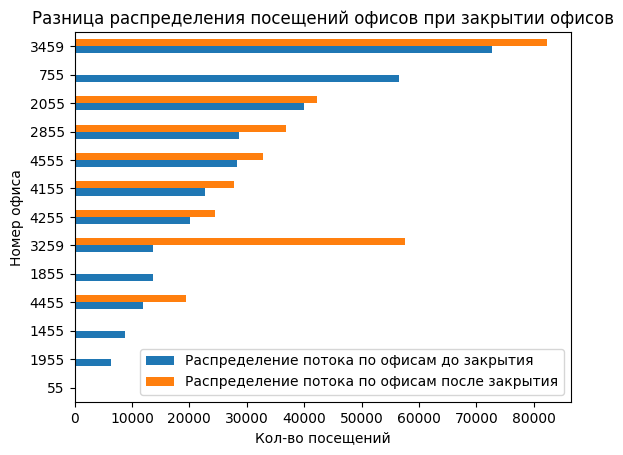

In [43]:
before_close = operations_tp_test_after.groupby('Код БИСКВИТ_оригинальный')["Код БИСКВИТ_оригинальный"].count().sort_values()
after_close = operations_tp_test_after.groupby('Код БИСКВИТ')['Код БИСКВИТ'].count().sort_values()

final_stats = pd.concat([before_close, after_close], axis=1)
final_stats = final_stats.rename(columns={'Код БИСКВИТ_оригинальный':'Распределение потока по офисам до закрытия',
                    'Код БИСКВИТ':'Распределение потока по офисам после закрытия'})
final_stats.plot(kind='barh')
plt.title('Разница распределения посещений офисов при закрытии офисов')
plt.xlabel('Кол-во посещений')
plt.ylabel('Номер офиса')
plt.show()





Выводы:  
Мы провели работу по геоаналитике и промоделировали, как изменится распределение клиентопотока, если закроются 4 офиса , используя оценку расстояний клиентов от офисов по формуле гаверсинусов.

Видим, что наибольший объём потока из 755-го офиса возьмёт на себя 3259-й, а остальные офисы распределят клиентопоток между собой по остаточному принципу достаточно равномерно,не вызвав сильную перегрузку в нескольких отделениях.
Подход имеет хорошую бизнесовую интерпретацию.